In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
print(os.listdir("../input"))

/kaggle/input/heart-disease-uci/heart.csv
['heart-disease-uci']


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import numpy as np
import numpy.matlib

In [3]:
df = pd.read_csv("../input/heart-disease-uci/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Data seems clean

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

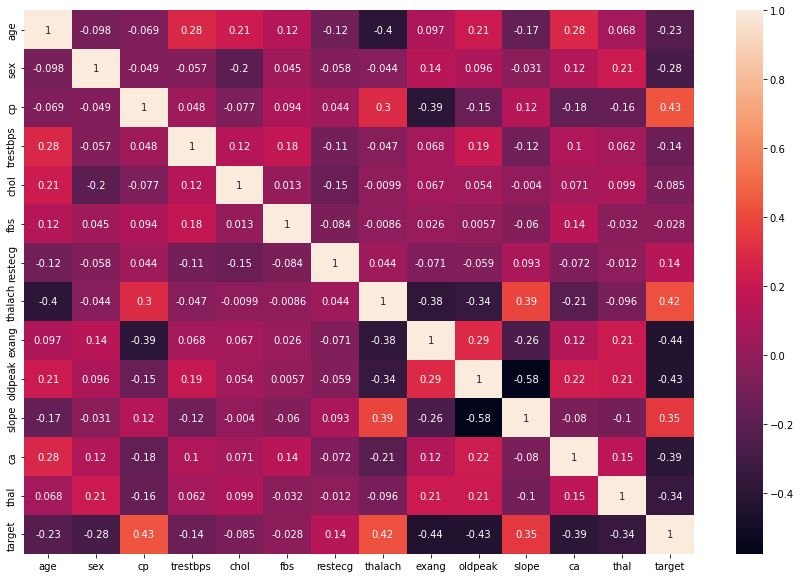

In [6]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True)

In [7]:
#chest_pain=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
#df=pd.concat([df,chest_pain],axis=1)
#df.drop(['cp'],axis=1,inplace=True)
#sp=pd.get_dummies(df['slope'],prefix='slope')
#th=pd.get_dummies(df['thal'],prefix='thal')
#rest_ecg=pd.get_dummies(df['restecg'],prefix='restecg')
#frames=[df,sp,th,rest_ecg]
#df=pd.concat(frames,axis=1)
#df.drop(['slope','thal','restecg'],axis=1,inplace=True)

In [8]:
df1 = df
df2 = df
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df2.drop(["trestbps", "chol", "fbs"], axis=1)

,age,sex,cp,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,0,150,0,2.3,0,0,1,1
1,37,1,2,1,187,0,3.5,0,0,2,1
2,41,0,1,0,172,0,1.4,2,0,2,1
3,56,1,1,1,178,0,0.8,2,0,2,1
4,57,0,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,1,123,1,0.2,1,0,3,0
299,45,1,3,1,132,0,1.2,1,0,3,0
300,68,1,0,1,141,0,3.4,1,2,3,0
301,57,1,0,1,115,1,1.2,1,1,3,0


In [10]:
len(df.columns)

14

In [11]:
len(df1.columns)

14

In [12]:
len(df2.columns)

14

In [13]:
model = keras.Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(11, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))

# Adding the second hidden layer
model.add(Dense(11, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [14]:
X = df2.drop(['target'], axis = 1)
y = df2.target.values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

2022-06-11 13:15:45.460338: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5413
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5496
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.7314
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.7893
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.8388
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.8347
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.8264
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8388
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8388
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8388
Epoch 11/

In [18]:
y_pred = model.predict(X_test)

accuracy of the model:  0.8688524590163934


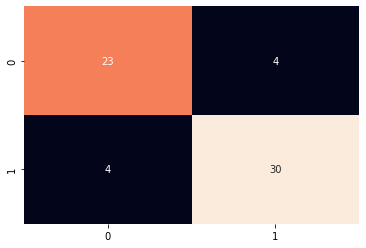

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)